# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

In [2]:
final_df = pd.read_csv("final.csv")

In [3]:
#Now that we have drop all the missing data, we can perform the transformations needed for each column
final_df['final_ID'] = final_df['final_ID'].astype('object')
final_df['Early_C'] = final_df['Early_C'].astype('object')
final_df['Days_LCtoDD'] = final_df['Days_LCtoDD'].astype('int64')
final_df['Days_InitialOrgtoDD'] = final_df['Days_InitialOrgtoDD'].astype('int64')
final_df['DifferenceTraveltoFirstMeeting'] = final_df['DifferenceTraveltoFirstMeeting'].astype('int64')
final_df['DifferenceTraveltoLastMeeting'] = final_df['DifferenceTraveltoLastMeeting'].astype('int64')
final_df['From_Grade'] = final_df['From_Grade'].astype('int64')
final_df['From_Grade'] = final_df['From_Grade'].astype('object')
final_df['To_Grade'] = final_df['To_Grade'].astype('int64')
final_df['To_Grade'] = final_df['To_Grade'].astype('object')
final_df['MDR_High_Grade'] = final_df['MDR_High_Grade'].astype('int64')
final_df['MDR_High_Grade'] = final_df['MDR_High_Grade'].astype('object')
final_df['School_Sponsor'] = final_df['School_Sponsor'].astype('object')
final_df['SPR_New_Existing'] = final_df['SPR_New_Existing'].astype('object')
final_df['NumberOfMeetingswithParents'] = final_df['NumberOfMeetingswithParents'].astype('object')

In [4]:
final_df.dtypes

final_ID                           object
From_Grade                         object
To_Grade                           object
Group_State                        object
Days                                int64
Travel_Type                        object
Departure_Month                     int64
Return_Month                        int64
Early_C                            object
Days_LCtoDD                         int64
Cancelled_Pax                       int64
Total_Discount_Pax                  int64
Days_InitialOrgtoDD                 int64
SPR_Product_Type                   object
FPP                                 int64
Total_Pax                           int64
GroupGradeType                     object
FPP_to_School_enrollment          float64
Days_DeptoDD                        int64
Tuition                             int64
FRP_Active                          int64
FRP_Cancelled                       int64
FRP_Take_up_percent_              float64
EZ_Pay_Take_Up_Rate               

In [5]:
# Display first few rows of the DataFrame
print(final_df.head())

  final_ID From_Grade To_Grade Group_State  Days Travel_Type  Departure_Month   
0        2          7        8          WA    15           A                3  \
1        3          7        7          OH    14           T                5   
2        4          9        9          HI    50           A                6   
3        6          6        8          OK    23           A                6   
4        7          8        9          MN    11           A                6   

   Return_Month Early_C  Days_LCtoDD  ...  MDR_High_Grade   
0             4       1          209  ...               8  \
1             5       0          192  ...               8   
2             7       0          172  ...              12   
3             7       0          245  ...               8   
4             6       1          231  ...              12   

   Total_School_Enrollment  Income_Level SPR_New_Existing   
0                      935             G                1  \
1                      7

# Data Exploration

## Univariate Distributions

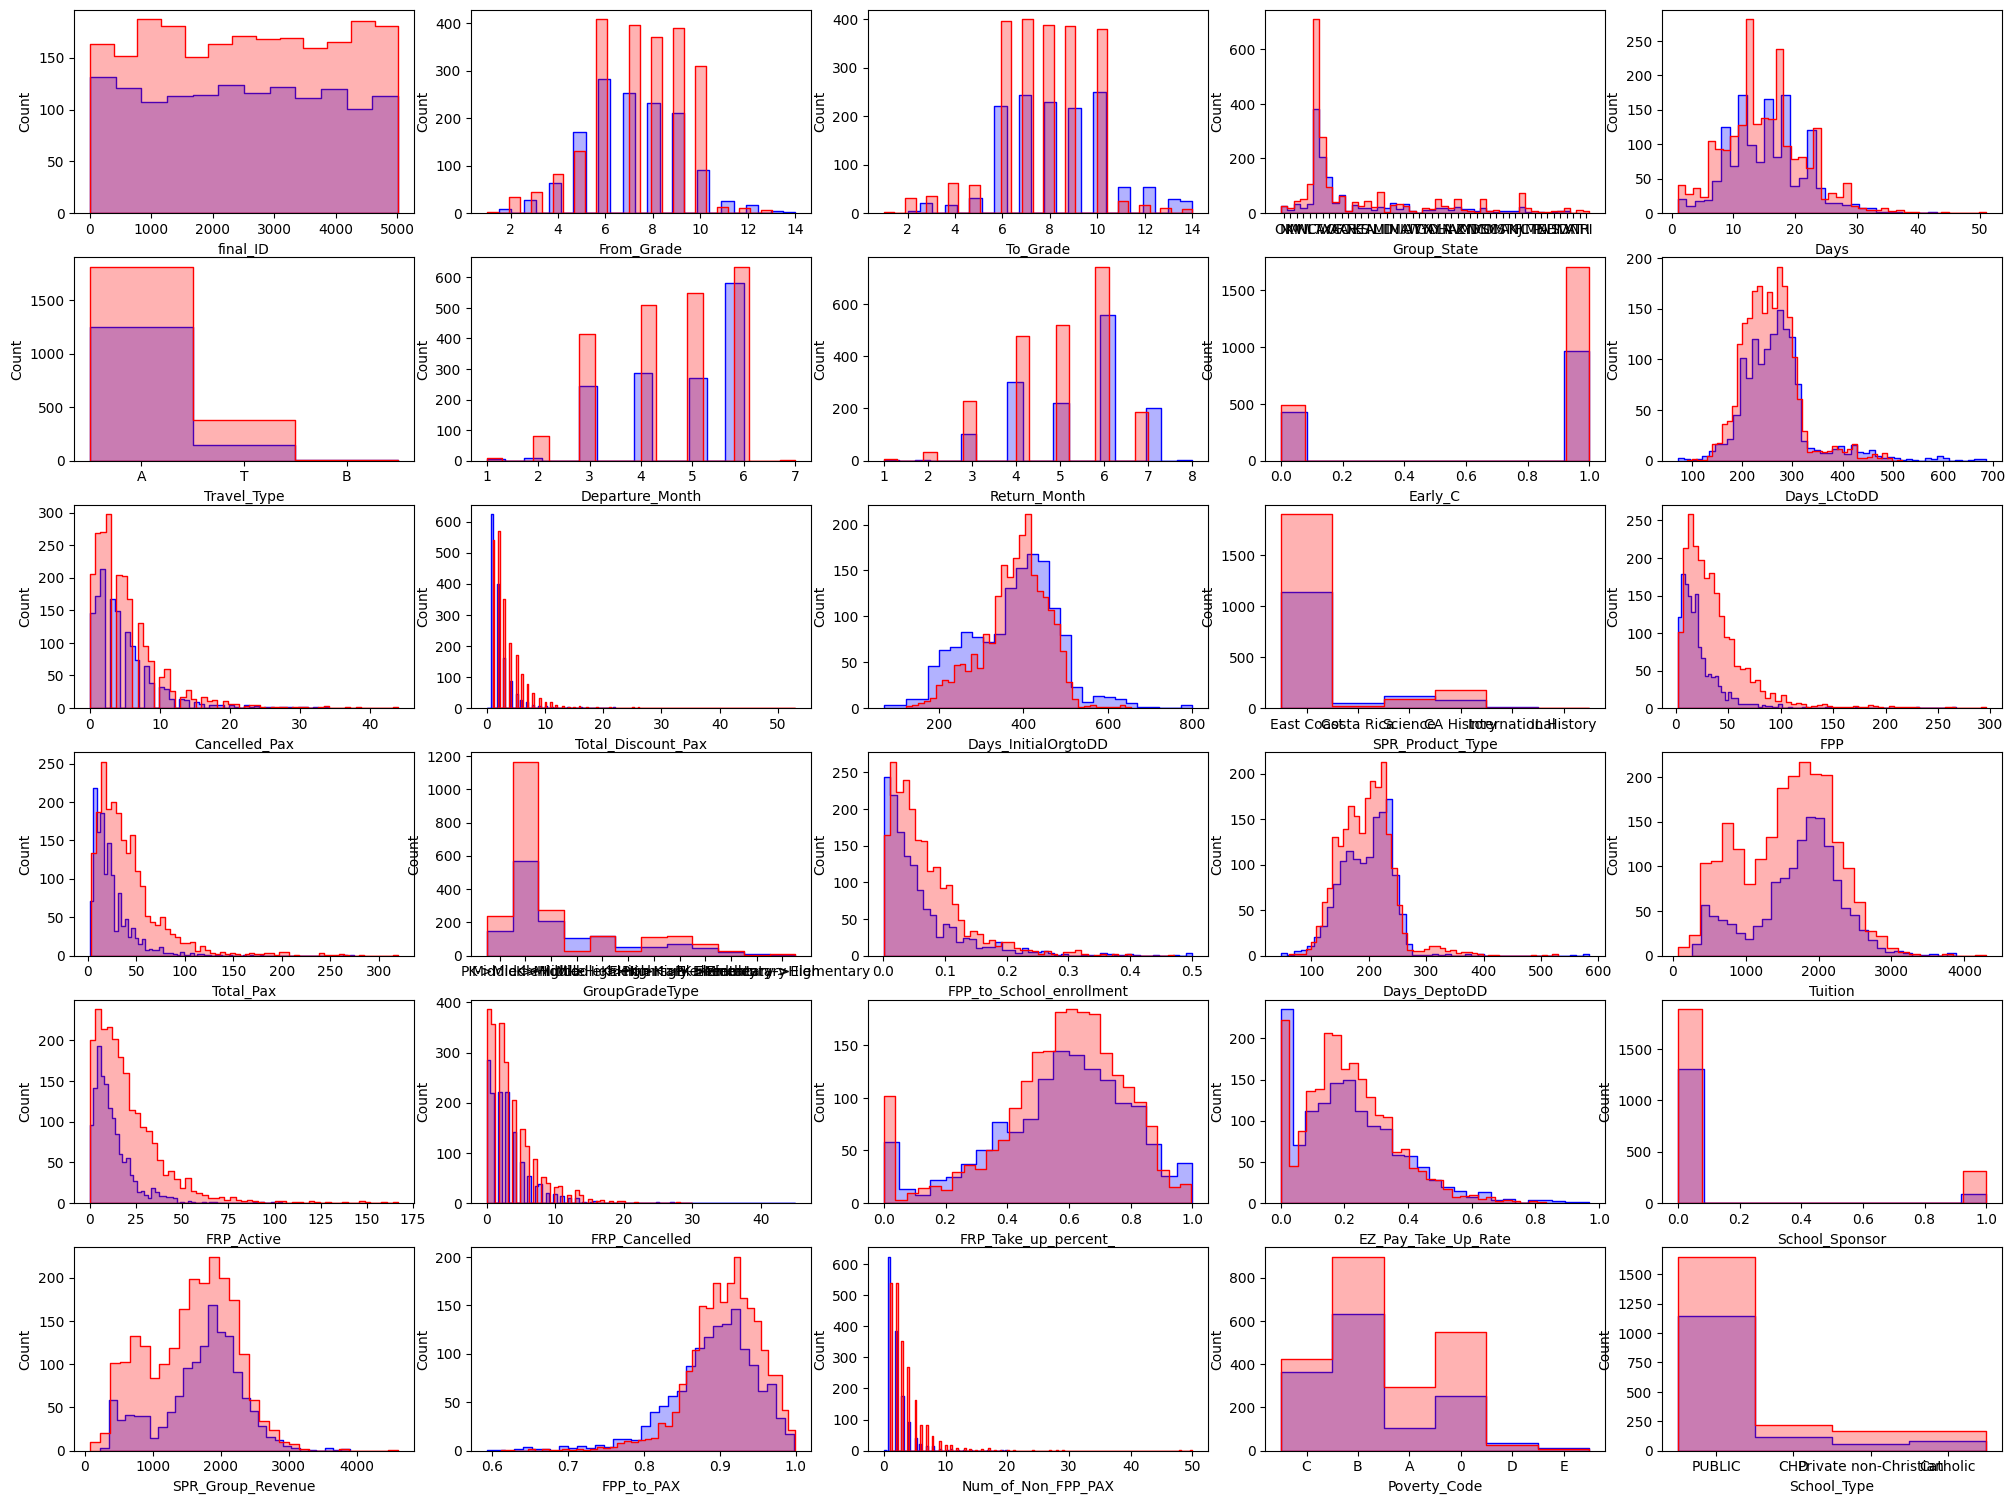

In [6]:
%matplotlib inline

X=final_df

X0 = X[X['Retained']==0]
X1 = X[X['Retained']==1]

fig, axes = plt.subplots(ncols=5, nrows=6, figsize=(20,15))
fig.tight_layout()

for i, ax in zip(range(X.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", element="step", ax=ax,  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", element="step", ax=ax,  alpha=0.3)
plt.show()

## Bivariate

In [7]:
# We take a sample of columns with the target

df_subset=final_df.copy()

df_subset=df_subset.iloc[:,:6]

In [8]:
df_subset['Retained']=final_df['Retained']
df_subset

,final_ID,From_Grade,To_Grade,Group_State,Days,Travel_Type,Retained
0,2,7,8,WA,15,A,1
1,3,7,7,OH,14,T,1
2,4,9,9,HI,50,A,1
3,6,6,8,OK,23,A,0
4,7,8,9,MN,11,A,1
...,...,...,...,...,...,...,...
3584,5007,5,5,CA,4,A,1
3585,5008,10,10,IL,14,A,1
3586,5010,7,7,CA,19,A,0
3587,5012,8,9,IL,6,A,0


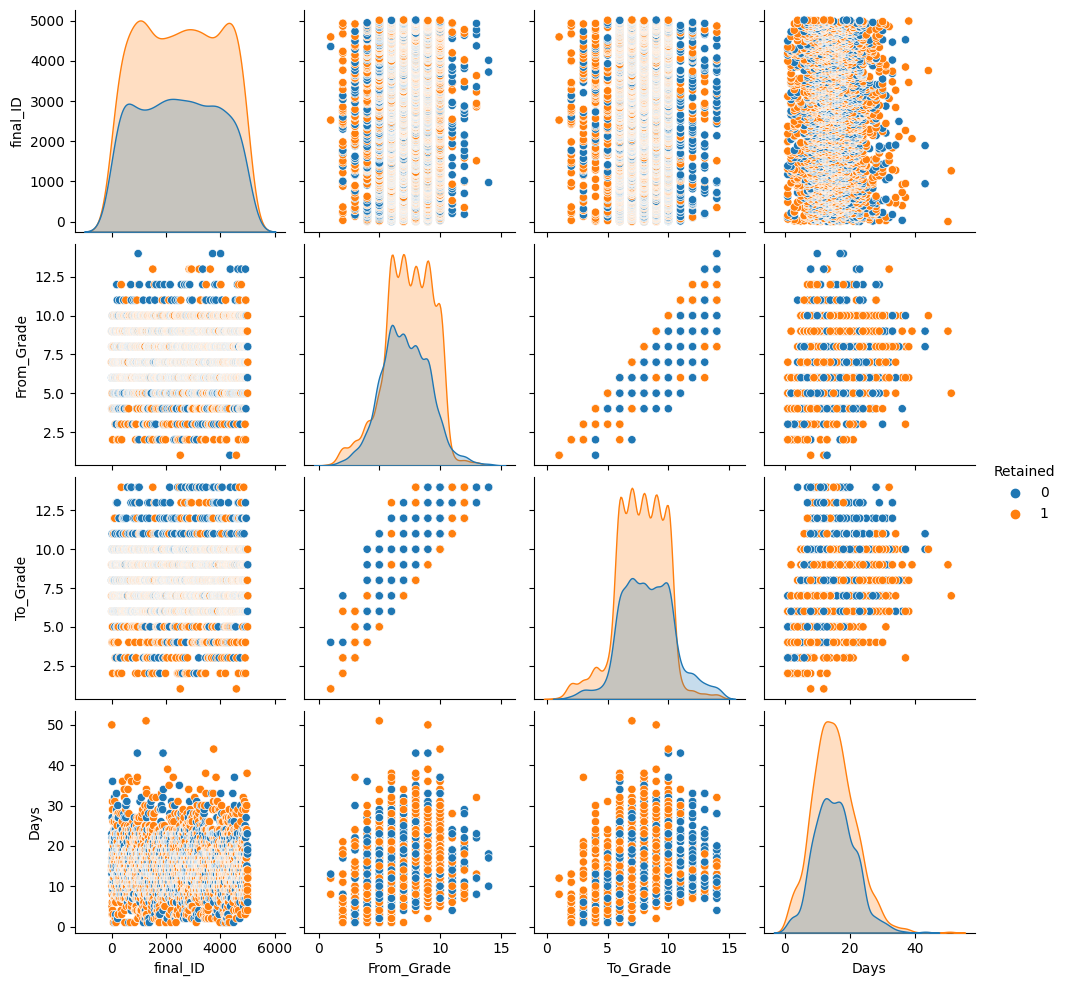

In [9]:
%matplotlib inline

sns.pairplot(df_subset,hue='Retained')

In [10]:
final_df

,final_ID,From_Grade,To_Grade,Group_State,Days,Travel_Type,Departure_Month,Return_Month,Early_C,Days_LCtoDD,...,MDR_High_Grade,Total_School_Enrollment,Income_Level,SPR_New_Existing,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SchoolGradeType,SchoolSizeIndicator,Retained
0,2,7,8,WA,15,A,3,4,1,209,...,8,935,G,1,1,174,175,Middle->Middle,L,1
1,3,7,7,OH,14,T,5,5,0,192,...,8,791,N,1,0,0,0,Middle->Middle,L,1
2,4,9,9,HI,50,A,6,7,0,172,...,12,3745,L,1,0,0,0,Middle->Middle,L,1
3,6,6,8,OK,23,A,6,7,0,245,...,8,945,Z,1,1,250,252,Middle->Middle,L,0
4,7,8,9,MN,11,A,6,6,1,231,...,12,549,I,1,2,377,266,Middle->High,S-M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,5007,5,5,CA,4,A,4,5,1,233,...,6,163,N,1,1,236,247,Elementary->Elementary,S,1
3585,5008,10,10,IL,14,A,5,5,0,221,...,8,481,O,0,0,0,0,Middle->Middle,S-M,1
3586,5010,7,7,CA,19,A,3,4,0,146,...,8,1050,M,0,1,145,136,Middle->Middle,L,0
3587,5012,8,9,IL,6,A,5,6,0,260,...,8,460,E,0,1,253,254,Middle->Middle,S-M,0


Bar Chart: count of Retained and Non-Retained students in the dataset; understand the distribution of the target variable

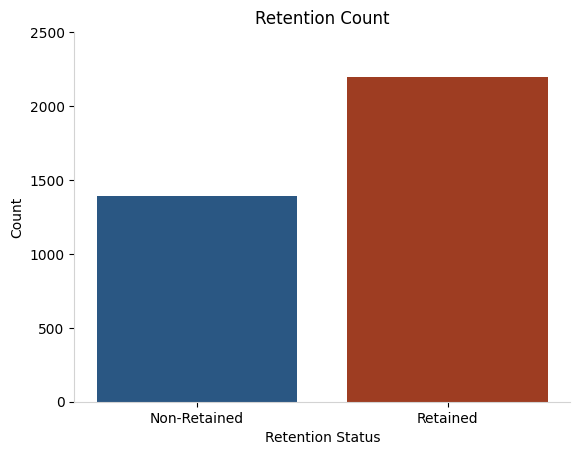

In [11]:
retained_counts = final_df['Retained'].value_counts()

plt.bar(retained_counts.index, retained_counts.values, color=['#9E3D22', '#2A5783'])
plt.xlabel('Retention Status')
plt.xticks([0, 1], ['Non-Retained', 'Retained'])
plt.ylabel('Count')
plt.title('Retention Count')

# Remove frame and set y-axis limit
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#D3D3D3')
plt.gca().spines['bottom'].set_color('#D3D3D3')
plt.gca().set_ylim([0, 2500])

# Show the plot
plt.show()

Histogram: count of Retained students by From Grade

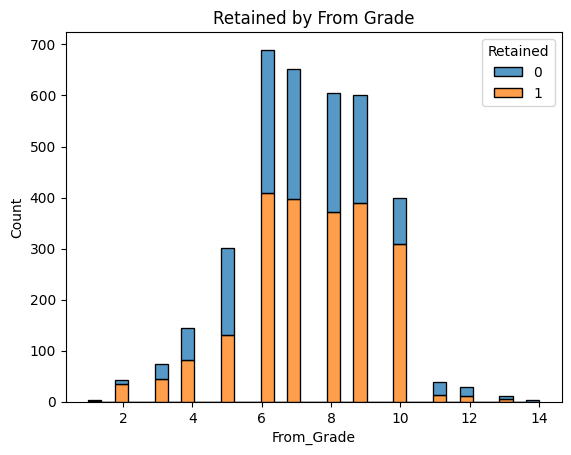

In [12]:
# Create the histogram
sns.histplot(data=final_df, x='From_Grade', hue='Retained', multiple='stack')
plt.title('Retained by From Grade')
plt.show()

Histogram: count of Retained students by To Grade

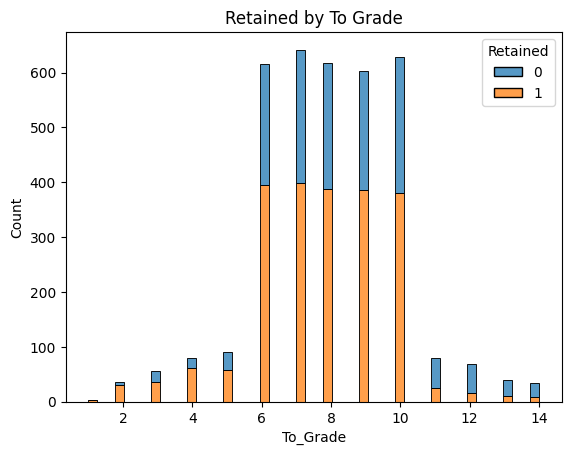

In [13]:
# Create the histogram
sns.histplot(data=final_df, x='To_Grade', hue='Retained', multiple='stack')
plt.title('Retained by To Grade')
plt.show()

Bar Plot: count of Retained students by State

In [14]:
grade_counts = final_df['From_Grade'].value_counts()
labels = grade_counts.index
sizes = grade_counts.values

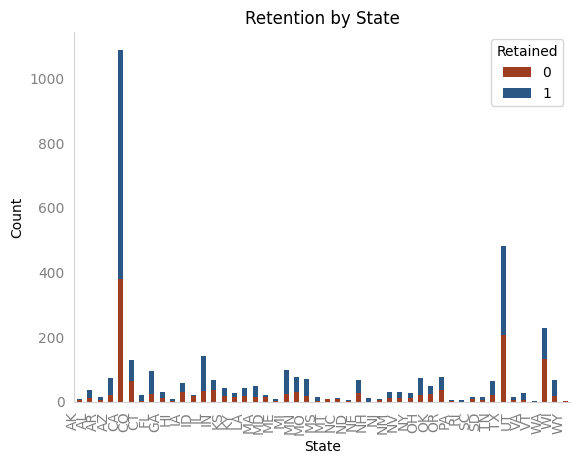

In [15]:
retained_by_state = final_df.groupby(['Group_State', 'Retained'])['final_ID'].count().unstack()
retained_by_state.plot(kind='bar', stacked=True, color=['#9E3D22', '#2A5783'])
plt.title('Retention by State', color='black')
plt.xlabel('State', color='black')
plt.ylabel('Count', color='black')
plt.xticks(rotation=90, ha='right', color='grey')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('#D3D3D3')
plt.gca().spines['left'].set_color('#D3D3D3')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().xaxis.set_ticks_position('none')
plt.tick_params(axis='both', colors='grey')
plt.show()

Density Plot: distribution of Retention by Days

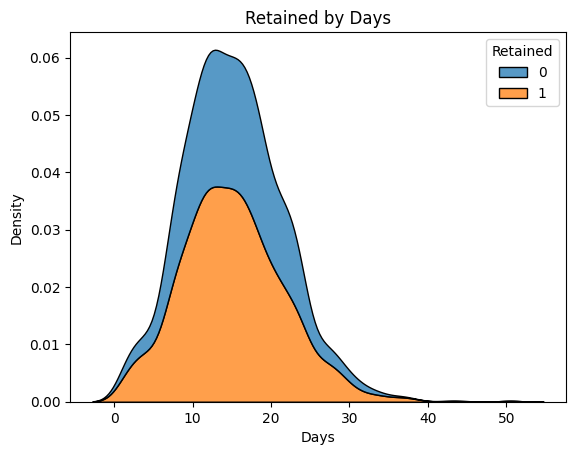

In [16]:
# Create a density plot
sns.kdeplot(data=final_df, x='Days', hue='Retained', multiple='stack')
plt.title('Retained by Days')
plt.show()

Pie Chart: Retention by Travel Type 

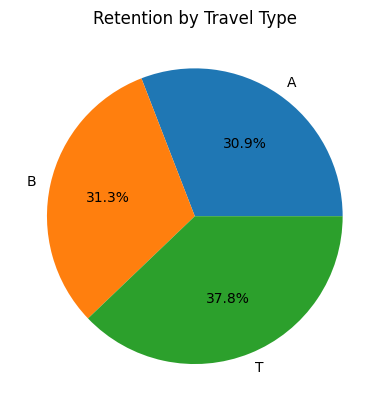

In [17]:
# Calculate the percentage of retention by travel type
retained_by_type = final_df.groupby('Travel_Type')['Retained'].mean()

# Create a pie chart showing the percentage of retention by travel type
plt.pie(retained_by_type, labels=retained_by_type.index, autopct='%1.1f%%')
plt.title('Retention by Travel Type')
plt.show()

Histogram: Retention by FPP

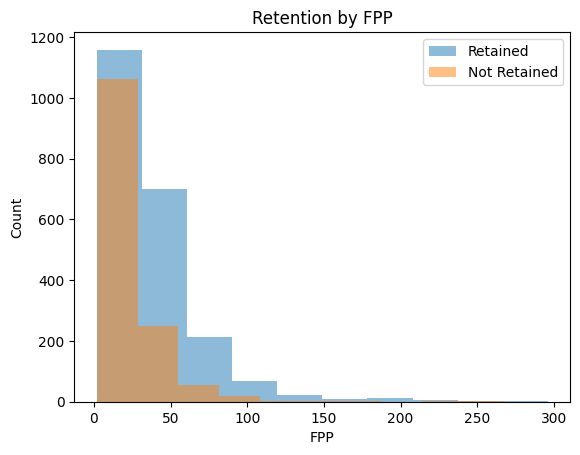

In [18]:
# create two subsets of the data, one for retained and one for not retained
retained = final_df[final_df['Retained'] == 1]
not_retained = final_df[final_df['Retained'] == 0]

# plot the histograms for each subset
plt.hist(retained['FPP'], alpha=0.5, label='Retained')
plt.hist(not_retained['FPP'], alpha=0.5, label='Not Retained')

# set the plot labels and title
plt.xlabel('FPP')
plt.ylabel('Count')
plt.title('Retention by FPP')

# add a legend to the plot
plt.legend()

# show the plot
plt.show()

Bar Chart: Retention by Poverty Code

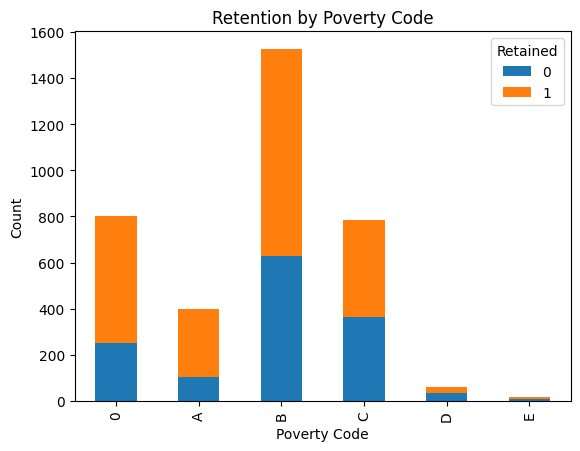

In [19]:
# Filter out rows with null values in the final_ID column
final_df_filtered = final_df.dropna(subset=['final_ID'])

# Group by Poverty_Code and Retained and count the number of final_ID values for each group
retained_by_poverty_code = final_df_filtered.groupby(['Poverty_Code', 'Retained'])['final_ID'].count().unstack()

# Remove columns with all zero values
retained_by_poverty_code = retained_by_poverty_code.loc[:, (retained_by_poverty_code != 0).any(axis=0)]

# Remove the column with the count of 0
retained_by_poverty_code = retained_by_poverty_code.loc[:, (retained_by_poverty_code != 0).all()]

# Plot the stacked bar chart
retained_by_poverty_code.plot(kind='bar', stacked=True)
plt.title('Retention by Poverty Code')
plt.xlabel('Poverty Code')
plt.ylabel('Count')
plt.show()

Histogram: Retention by Departure Month

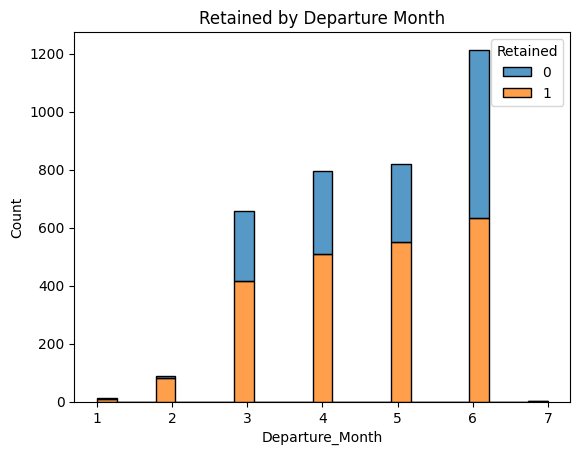

In [20]:
# Create the histogram
sns.histplot(data=final_df, x='Departure_Month', hue='Retained', multiple='stack')
plt.title('Retained by Departure Month')
plt.show()

Histogram: Retention by Return Month

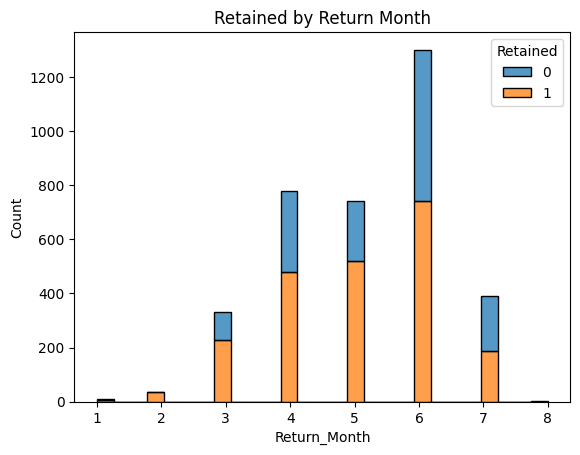

In [21]:
# Create the histogram
sns.histplot(data=final_df, x='Return_Month', hue='Retained', multiple='stack')
plt.title('Retained by Return Month')
plt.show()

Density Plot: distribution of Retention by Days_LCtoDD

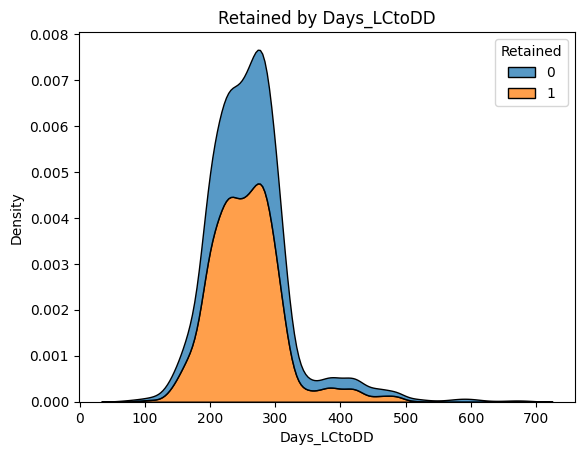

In [22]:
# Create a density plot
sns.kdeplot(data=final_df, x='Days_LCtoDD', hue='Retained', multiple='stack')
plt.title('Retained by Days_LCtoDD')
plt.show()

Bar Plot: Cancelled Pax by Departure Month and Return Month

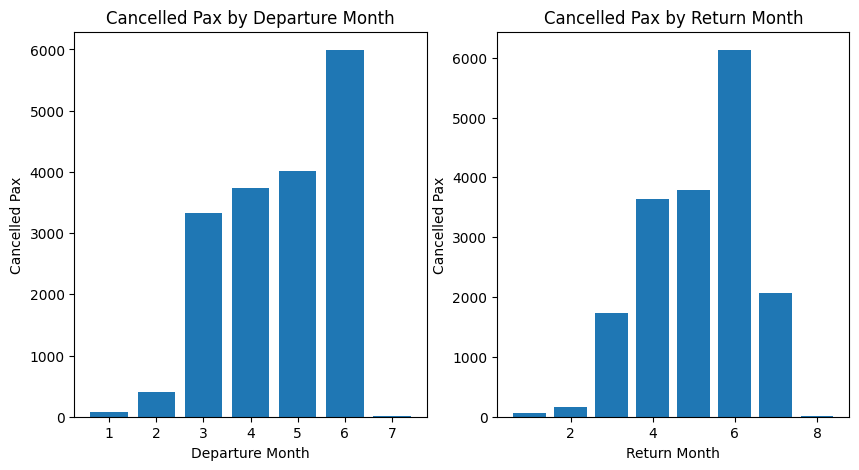

In [23]:
# Group the data by Departure_Month and sum the Cancelled_Pax values for each group
cancelled_by_departure = final_df.groupby('Departure_Month')['Cancelled_Pax'].sum()
cancelled_by_return = final_df.groupby('Return_Month')['Cancelled_Pax'].sum()

# Create the side-by-side bar plots
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].bar(cancelled_by_departure.index, cancelled_by_departure.values)
ax[0].set_title('Cancelled Pax by Departure Month')
ax[0].set_xlabel('Departure Month')
ax[0].set_ylabel('Cancelled Pax')
ax[1].bar(cancelled_by_return.index, cancelled_by_return.values)
ax[1].set_title('Cancelled Pax by Return Month')
ax[1].set_xlabel('Return Month')
ax[1].set_ylabel('Cancelled Pax')
plt.show()

Bar Plot: Retained by SPR_Product_Type

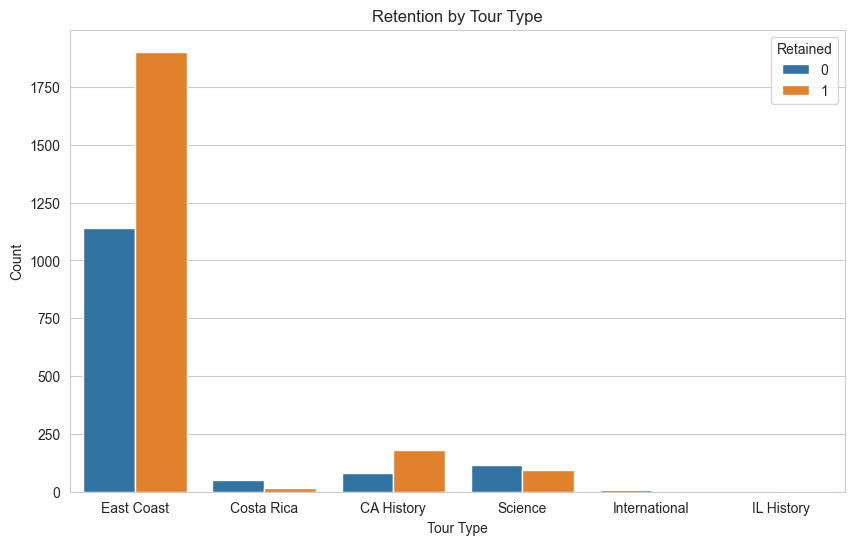

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.countplot(x="SPR_Product_Type", hue="Retained", data=final_df)

plt.title("Retention by Tour Type")
plt.xlabel("Tour Type")
plt.ylabel("Count")

plt.show()

Bar Plot: Retained by School Type

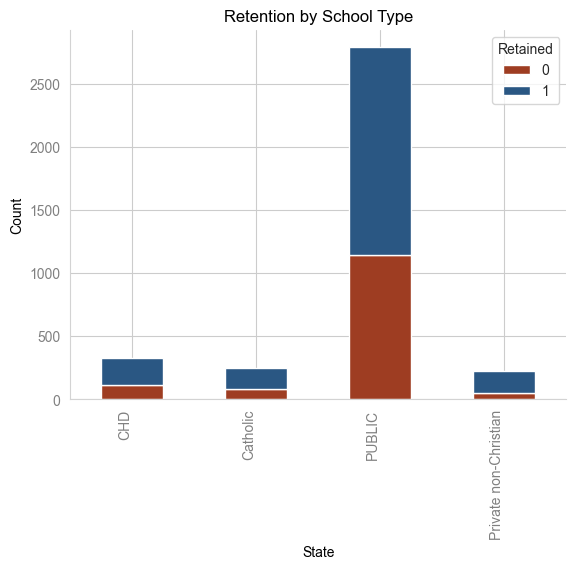

In [25]:
retained_by_school_type = final_df.groupby(['School_Type', 'Retained'])['final_ID'].count().unstack()
retained_by_school_type.plot(kind='bar', stacked=True, color=['#9E3D22', '#2A5783'])
plt.title('Retention by School Type', color='black')
plt.xlabel('State', color='black')
plt.ylabel('Count', color='black')
plt.xticks(rotation=90, ha='right', color='grey')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('#D3D3D3')
plt.gca().spines['left'].set_color('#D3D3D3')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().xaxis.set_ticks_position('none')
plt.tick_params(axis='both', colors='grey')
plt.show()

Bar Plot: Retention by School Grade Type

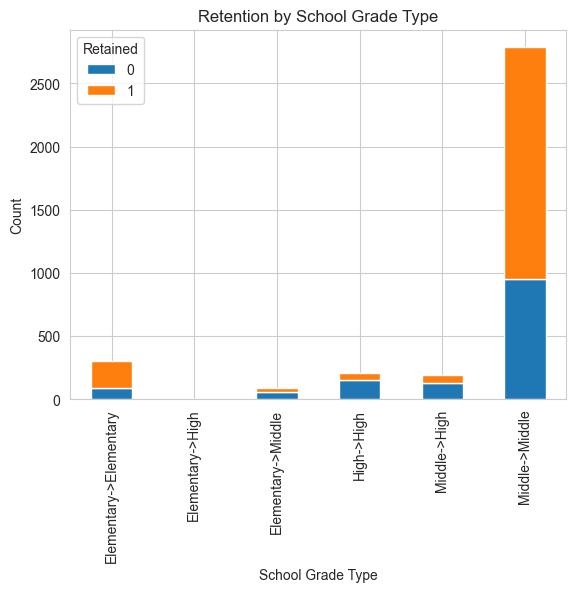

In [26]:
retained_by_school_grade_type = final_df.groupby(['SchoolGradeType', 'Retained'])['final_ID'].count().unstack()
retained_by_school_grade_type.plot(kind='bar', stacked=True)
plt.title('Retention by School Grade Type')
plt.xlabel('School Grade Type')
plt.ylabel('Count')
plt.show()

Bar Plot: Retained by School Size Indicator

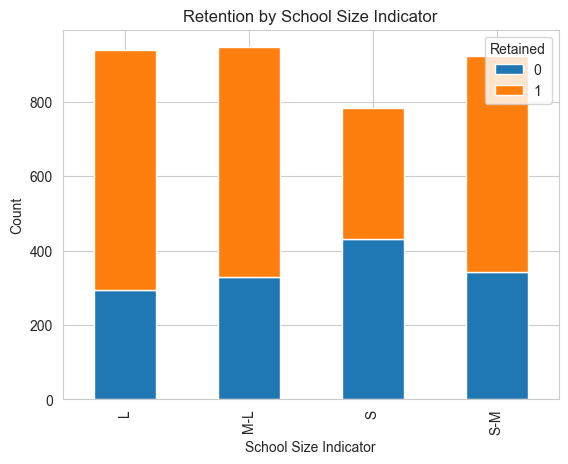

In [27]:
retained_by_school_size_indicator = final_df.groupby(['SchoolSizeIndicator', 'Retained'])['final_ID'].count().unstack()
retained_by_school_size_indicator.plot(kind='bar', stacked=True)
plt.title('Retention by School Size Indicator')
plt.xlabel('School Size Indicator')
plt.ylabel('Count')
plt.show()

Bar Plot: Retained by Number of Meetings with Parents

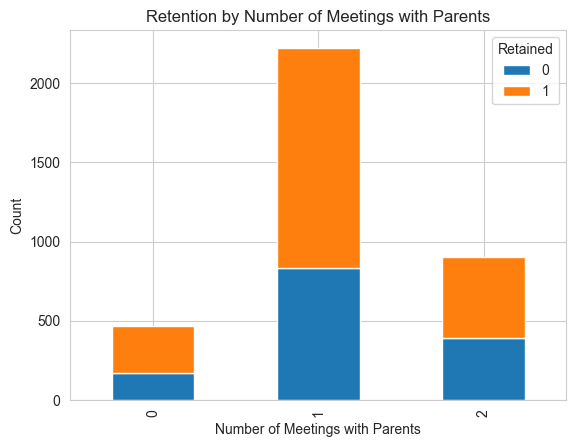

In [28]:
retained_by_num_of_meetings_w_parents = final_df.groupby(['NumberOfMeetingswithParents', 'Retained'])['final_ID'].count().unstack()
retained_by_num_of_meetings_w_parents.plot(kind='bar', stacked=True)
plt.title('Retention by Number of Meetings with Parents')
plt.xlabel('Number of Meetings with Parents')
plt.ylabel('Count')
plt.show()

Bar Plot: Retention by Number of Non-FPP Pax

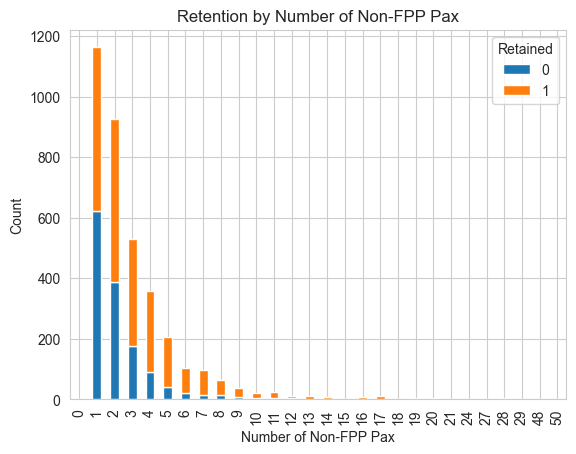

In [29]:
retained_by_num_of_non_fpp_pax = final_df.groupby(['Num_of_Non_FPP_PAX', 'Retained'])['final_ID'].count().unstack()
retained_by_num_of_non_fpp_pax.plot(kind='bar', stacked=True)
plt.title('Retention by Number of Non-FPP Pax')
plt.xlabel('Number of Non-FPP Pax')
plt.ylabel('Count')
plt.show()

Histogram: Retention by Number of FPP

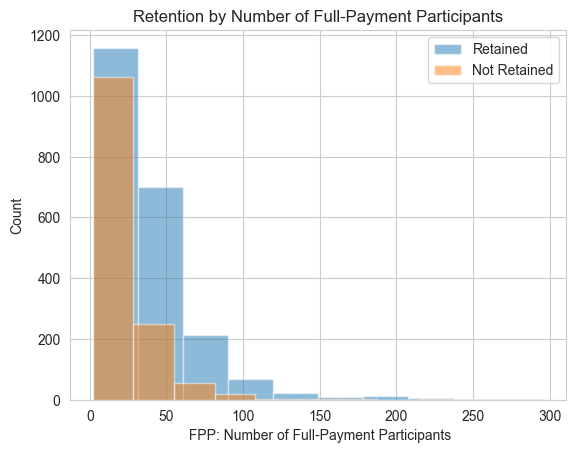

In [30]:
# Create the histogram
plt.hist(final_df[final_df['Retained']==1]['FPP'], bins=10, alpha=0.5, label='Retained')
plt.hist(final_df[final_df['Retained']==0]['FPP'], bins=10, alpha=0.5, label='Not Retained')
plt.title('Retention by Number of Full-Payment Participants')
plt.xlabel(' FPP: Number of Full-Payment Participants')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

Histogram: Retention by number of Non-FPP

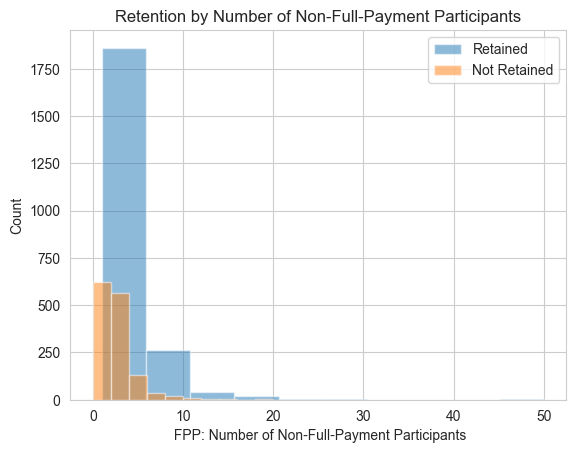

In [31]:
# Create the histogram
plt.hist(final_df[final_df['Retained']==1]['Num_of_Non_FPP_PAX'], bins=10, alpha=0.5, label='Retained')
plt.hist(final_df[final_df['Retained']==0]['Num_of_Non_FPP_PAX'], bins=10, alpha=0.5, label='Not Retained')
plt.title('Retention by Number of Non-Full-Payment Participants')
plt.xlabel(' FPP: Number of Non-Full-Payment Participants')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

Histogram: Retention by "Days from First Parent Meeting to Travel Date"

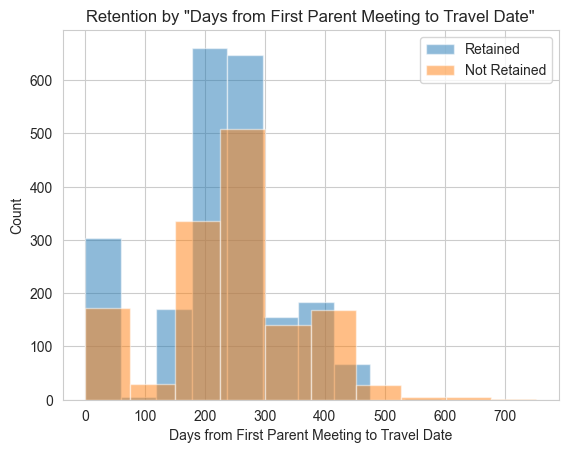

In [32]:
# Create the histogram
plt.hist(final_df[final_df['Retained']==1]['DifferenceTraveltoFirstMeeting'], bins=10, alpha=0.5, label='Retained')
plt.hist(final_df[final_df['Retained']==0]['DifferenceTraveltoFirstMeeting'], bins=10, alpha=0.5, label='Not Retained')
plt.title('Retention by "Days from First Parent Meeting to Travel Date"')
plt.xlabel('Days from First Parent Meeting to Travel Date')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

Scatterplot: Retention by Grades

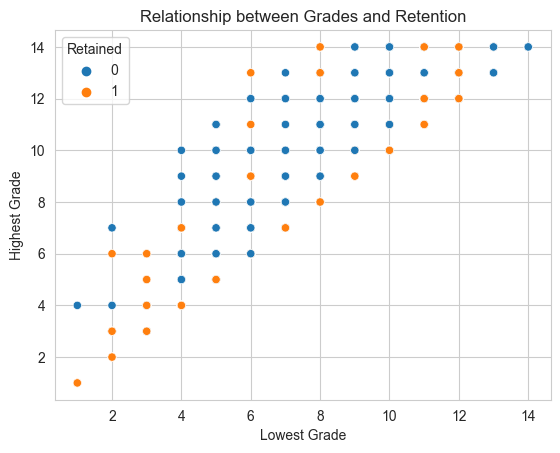

In [33]:
sns.scatterplot(data=final_df, x='From_Grade', y='To_Grade', hue='Retained')
plt.title('Relationship between Grades and Retention')
plt.xlabel('Lowest Grade')
plt.ylabel('Highest Grade')
plt.show()

Box Plot: Retention by From Grade

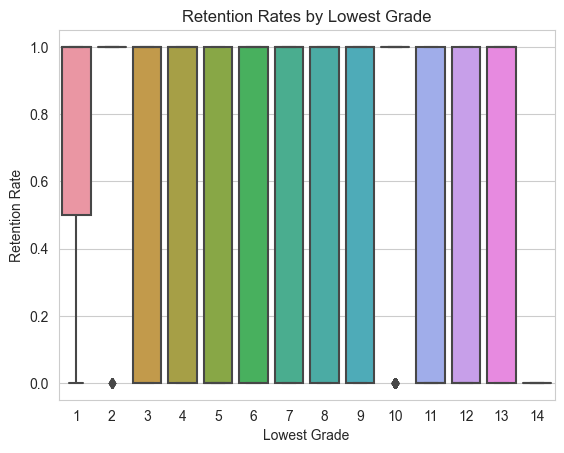

In [34]:
sns.boxplot(data=final_df, x='From_Grade', y='Retained')
plt.title('Retention Rates by Lowest Grade')
plt.xlabel('Lowest Grade')
plt.ylabel('Retention Rate')
plt.show()

Box Plot: Retention by To Grade

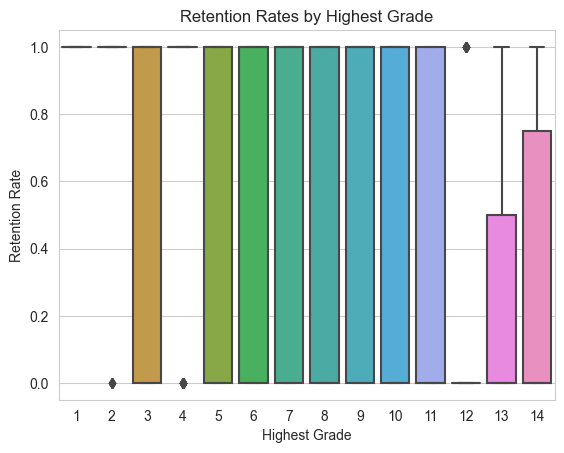

In [35]:
sns.boxplot(data=final_df, x='To_Grade', y='Retained')
plt.title('Retention Rates by Highest Grade')
plt.xlabel('Highest Grade')
plt.ylabel('Retention Rate')
plt.show()

Heatmap: Retention by Grade Range

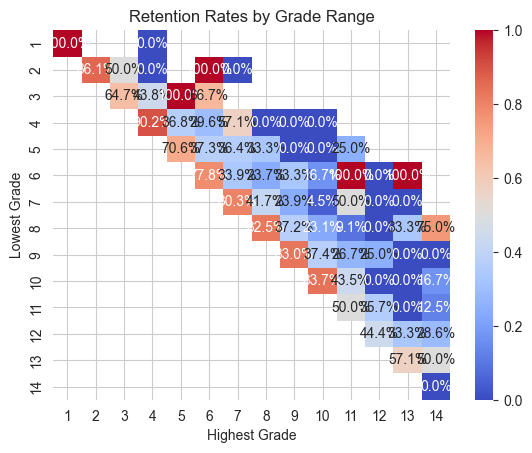

In [36]:
# Pivot the data to create a matrix of retention rates by grade range
retained_by_grade = final_df.pivot_table(index='From_Grade', columns='To_Grade', values='Retained')

sns.heatmap(retained_by_grade, cmap='coolwarm', annot=True, fmt='.1%')
plt.title('Retention Rates by Grade Range')
plt.xlabel('Highest Grade')
plt.ylabel('Lowest Grade')
plt.show()

Histogram: Retention by To Grade

count    14.000000
mean      0.580934
std       0.233968
min       0.231884
25%       0.388375
50%       0.632606
75%       0.643902
max       1.000000
Name: Retained, dtype: float64


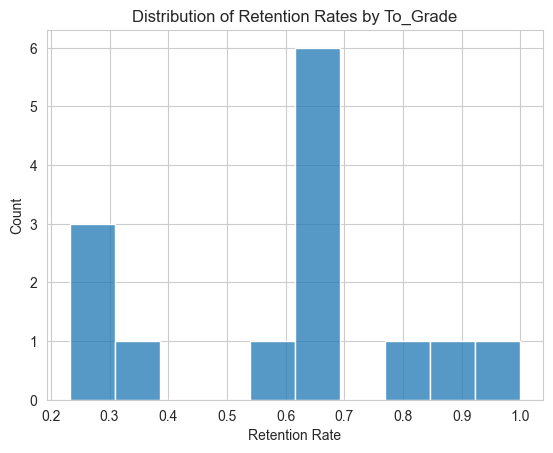

In [38]:
# group the data by To_Grade and calculate the mean retention for each group
retention_by_grade = final_df.groupby('To_Grade')['Retained'].mean()

# display summary statistics for the retention rates
print(retention_by_grade.describe())

# create a histogram of the retention rates
sns.histplot(data=retention_by_grade, bins=10)
plt.title('Distribution of Retention Rates by To_Grade')
plt.xlabel('Retention Rate')
plt.ylabel('Count')
plt.show()

Heatmap: Retention - From Grade and To Grade

<Axes: xlabel='To_Grade', ylabel='From_Grade'>

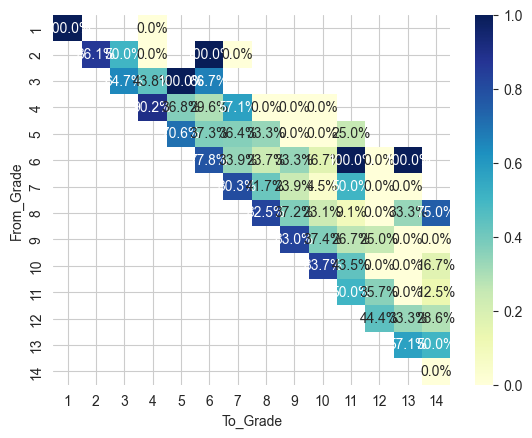

In [39]:
# create a pivot table to count the number of retained and not retained for each combination of From_Grade and To_Grade
pivot_table = pd.pivot_table(data=final_df, index='From_Grade', columns='To_Grade', values='Retained', aggfunc=['count', 'sum'])

# calculate the retention rate for each combination
retention_rates = pivot_table['sum'] / pivot_table['count']

# plot the retention rates using a heatmap
sns.heatmap(retention_rates, annot=True, fmt=".1%", cmap="YlGnBu")

Density Plot: Retention by Days from First Parent Meeting to Travel Date

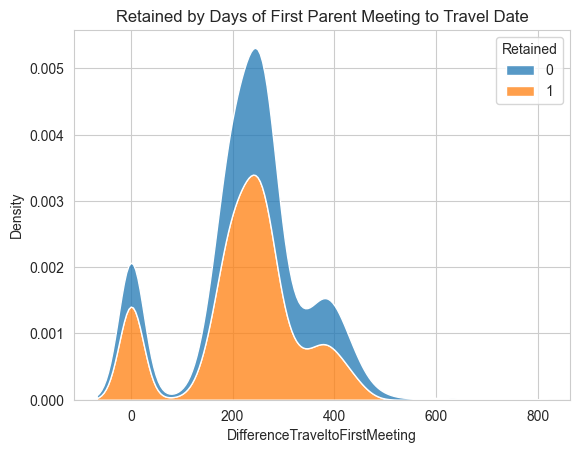

In [40]:
# Create a density plot
sns.kdeplot(data=final_df, x='DifferenceTraveltoFirstMeeting', hue='Retained', multiple='stack')
plt.title('Retained by Days of First Parent Meeting to Travel Date')
plt.show()

Bar Plot: Retention by Travel Type

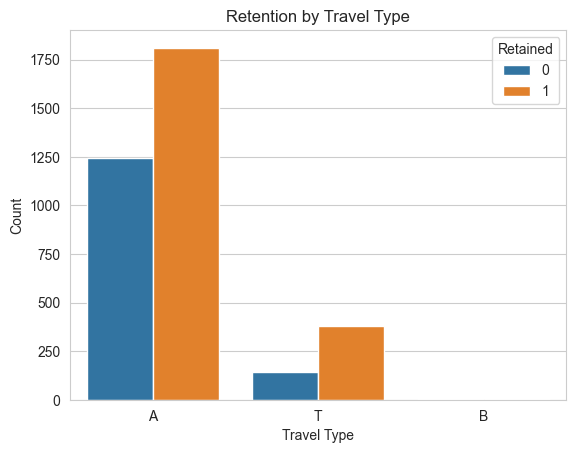

In [41]:
sns.countplot(x='Travel_Type', hue='Retained', data=final_df)
plt.title('Retention by Travel Type')
plt.xlabel('Travel Type')
plt.ylabel('Count')
plt.show()

Bar Plot: Retention by Early Communication

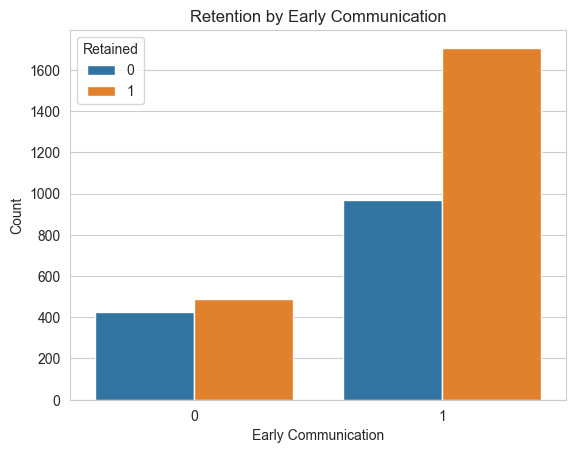

In [42]:
sns.countplot(x='Early_C', hue='Retained', data=final_df)
plt.title('Retention by Early Communication')
plt.xlabel('Early Communication')
plt.ylabel('Count')
plt.show()

Pie Chart: Retention by Early Communication

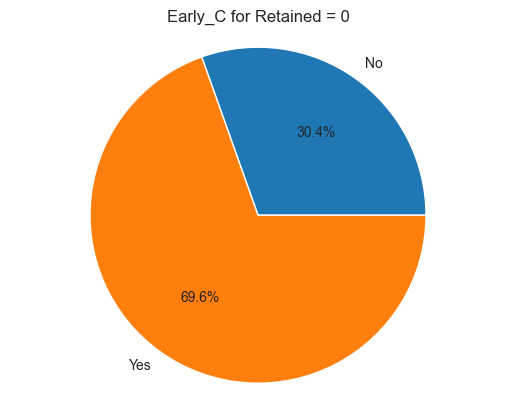

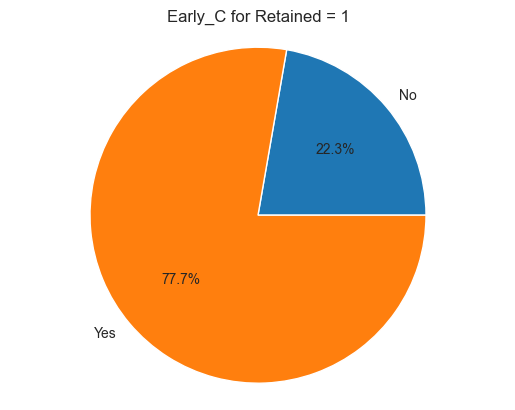

In [43]:
# create a filtered data frame for each value of Retained
retained_0 = final_df[final_df['Retained'] == 0]
retained_1 = final_df[final_df['Retained'] == 1]

# create a pie chart for Retained = 0
sizes_0 = [len(retained_0[retained_0['Early_C'] == 0]), len(retained_0[retained_0['Early_C'] == 1])]
labels_0 = ['No', 'Yes']
plt.pie(sizes_0, labels=labels_0, autopct='%1.1f%%')
plt.title('Early_C for Retained = 0')
plt.axis('equal')
plt.show()

# create a pie chart for Retained = 1
sizes_1 = [len(retained_1[retained_1['Early_C'] == 0]), len(retained_1[retained_1['Early_C'] == 1])]
labels_1 = ['No', 'Yes']
plt.pie(sizes_1, labels=labels_1, autopct='%1.1f%%')
plt.title('Early_C for Retained = 1')
plt.axis('equal')
plt.show()

Density Plot: Retention by Days from Last Communication to Departure

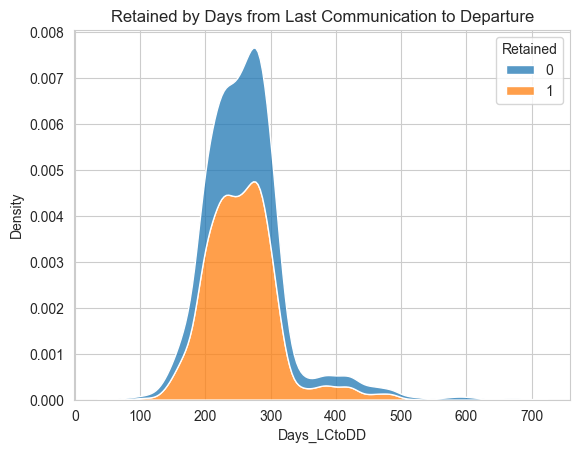

In [44]:
# Create a density plot
sns.kdeplot(data=final_df, x='Days_LCtoDD', hue='Retained', multiple='stack')
plt.title('Retained by Days from Last Communication to Departure')
plt.show()

Histogram: Retention by Days from Last Communication to Departure

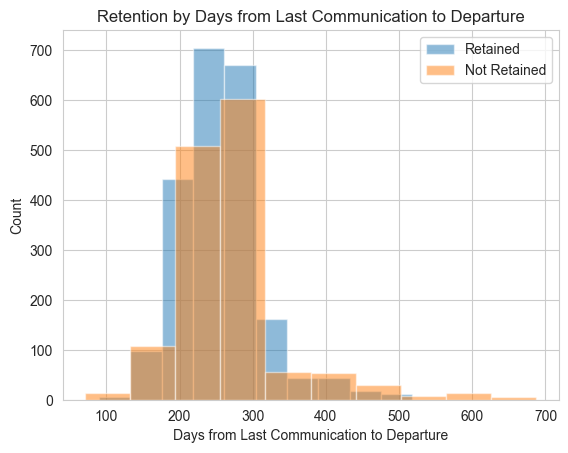

In [45]:
# Create the histogram
plt.hist(final_df[final_df['Retained']==1]['Days_LCtoDD'], bins=10, alpha=0.5, label='Retained')
plt.hist(final_df[final_df['Retained']==0]['Days_LCtoDD'], bins=10, alpha=0.5, label='Not Retained')
plt.title('Retention by Days from Last Communication to Departure')
plt.xlabel('Days from Last Communication to Departure')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

Density Plot: Retention by Days from First Meeting to Departure

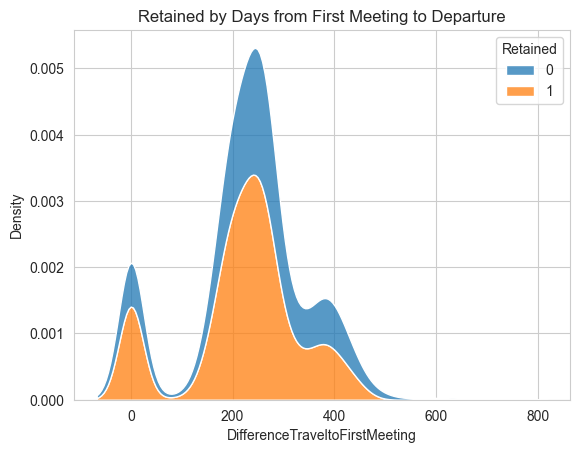

In [46]:
# Create a density plot
sns.kdeplot(data=final_df, x='DifferenceTraveltoFirstMeeting', hue='Retained', multiple='stack')
plt.title('Retained by Days from First Meeting to Departure')
plt.show()

Bar Chart: Retention by FPP and Pax Type

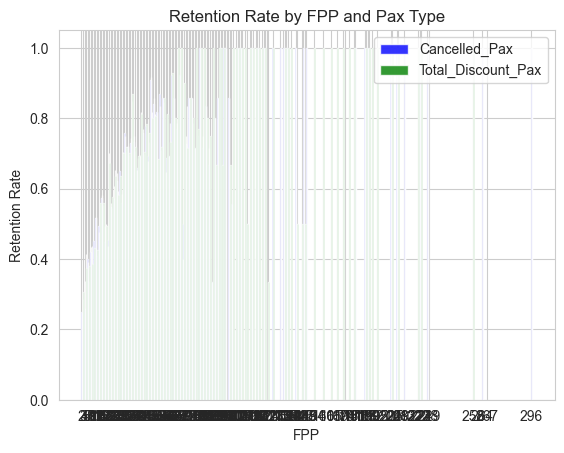

In [47]:
# create a filtered data frame for Cancelled_Pax and Total_Discount_Pax
cancelled_pax = final_df[final_df['Cancelled_Pax'] > 0]
discount_pax = final_df[final_df['Total_Discount_Pax'] > 0]

# calculate the retention rate for each FPP level in Cancelled_Pax and Total_Discount_Pax
cancelled_rate = cancelled_pax.groupby('FPP')['Retained'].mean().reset_index()
discount_rate = discount_pax.groupby('FPP')['Retained'].mean().reset_index()

# create a grouped bar chart
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(cancelled_rate['FPP'], cancelled_rate['Retained'], bar_width,
                alpha=opacity, color='b', label='Cancelled_Pax')
rects2 = ax.bar(discount_rate['FPP'] + bar_width, discount_rate['Retained'], bar_width,
                alpha=opacity, color='g', label='Total_Discount_Pax')

ax.set_xlabel('FPP')
ax.set_ylabel('Retention Rate')
ax.set_title('Retention Rate by FPP and Pax Type')
ax.set_xticks(cancelled_rate['FPP'])
ax.legend()

plt.show()

Bar Chart Plot: Retention by FPP in Cancelled Pax

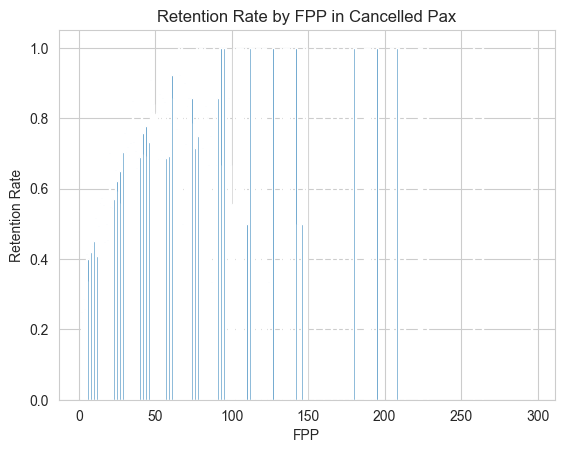

In [48]:
# create a filtered data frame for Cancelled_Pax
cancelled_pax = final_df[final_df['Cancelled_Pax'] > 0]

# calculate the retention rate for each FPP level in Cancelled_Pax
cancelled_rate = cancelled_pax.groupby('FPP')['Retained'].mean().reset_index()

# create a bar chart
plt.bar(cancelled_rate['FPP'], cancelled_rate['Retained'])
plt.xlabel('FPP')
plt.ylabel('Retention Rate')
plt.title('Retention Rate by FPP in Cancelled Pax')

plt.show()

Histogram: Retention by Days from Last Communication to Departure

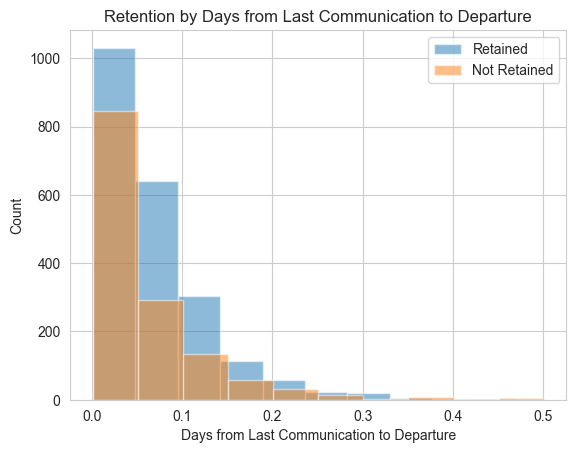

In [49]:
# Create the histogram
plt.hist(final_df[final_df['Retained']==1]['FPP_to_School_enrollment'], bins=10, alpha=0.5, label='Retained')
plt.hist(final_df[final_df['Retained']==0]['FPP_to_School_enrollment'], bins=10, alpha=0.5, label='Not Retained')
plt.title('Retention by Days from Last Communication to Departure')
plt.xlabel('Days from Last Communication to Departure')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

Histogram: Retention by MDR High Grade

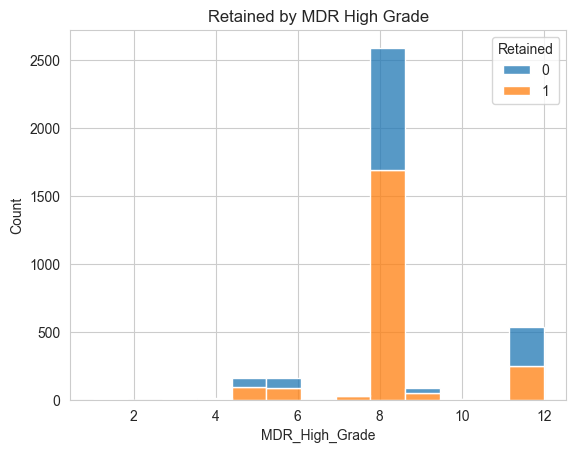

In [50]:
# Create the histogram
sns.histplot(data=final_df, x='MDR_High_Grade', hue='Retained', multiple='stack')
plt.title('Retained by MDR High Grade')
plt.show()

In [51]:
Histogram: Retention by MDR Low Grade

SyntaxError: invalid syntax (387357289.py, line 1)

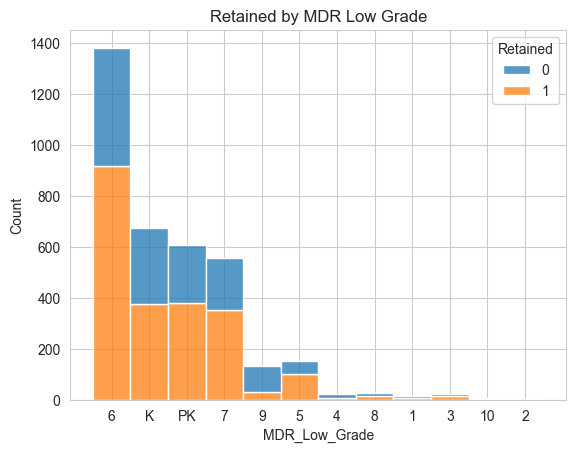

In [52]:
# Create the histogram
sns.histplot(data=final_df, x='MDR_Low_Grade', hue='Retained', multiple='stack')
plt.title('Retained by MDR Low Grade')
plt.show()

Bar Plot: Retention by School Sponsor

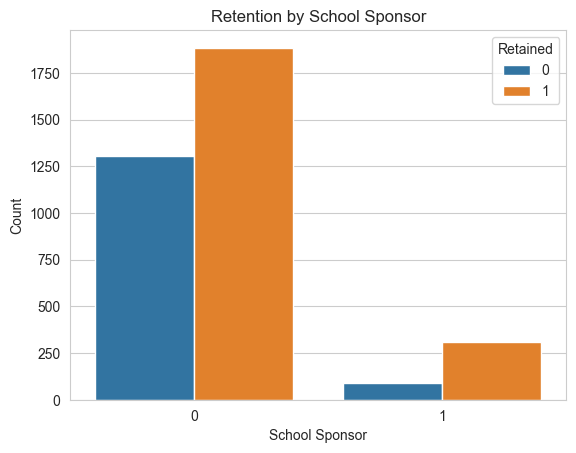

In [53]:
sns.countplot(x='School_Sponsor', hue='Retained', data=final_df)
plt.title('Retention by School Sponsor')
plt.xlabel('School Sponsor')
plt.ylabel('Count')
plt.show()

Pie Chart: Retention by School Sponsor

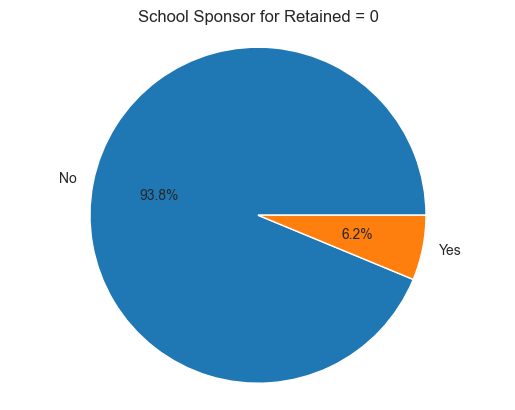

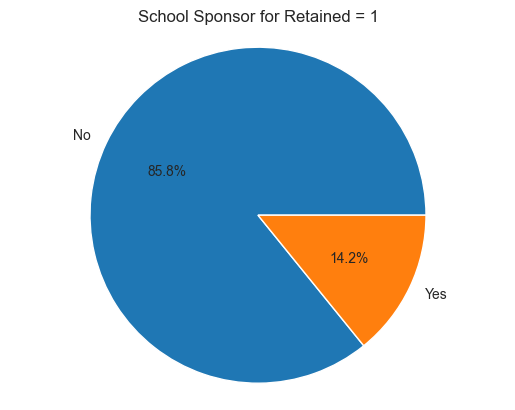

In [54]:
# create a filtered data frame for each value of Retained
retained_0 = final_df[final_df['Retained'] == 0]
retained_1 = final_df[final_df['Retained'] == 1]

# create a pie chart for Retained = 0
sizes_0 = [len(retained_0[retained_0['School_Sponsor'] == 0]), len(retained_0[retained_0['School_Sponsor'] == 1])]
labels_0 = ['No', 'Yes']
plt.pie(sizes_0, labels=labels_0, autopct='%1.1f%%')
plt.title('School Sponsor for Retained = 0')
plt.axis('equal')
plt.show()

# create a pie chart for Retained = 1
sizes_1 = [len(retained_1[retained_1['School_Sponsor'] == 0]), len(retained_1[retained_1['School_Sponsor'] == 1])]
labels_1 = ['No', 'Yes']
plt.pie(sizes_1, labels=labels_1, autopct='%1.1f%%')
plt.title('School Sponsor for Retained = 1')
plt.axis('equal')
plt.show()

Histogram: Retention by SPR Group Revenue

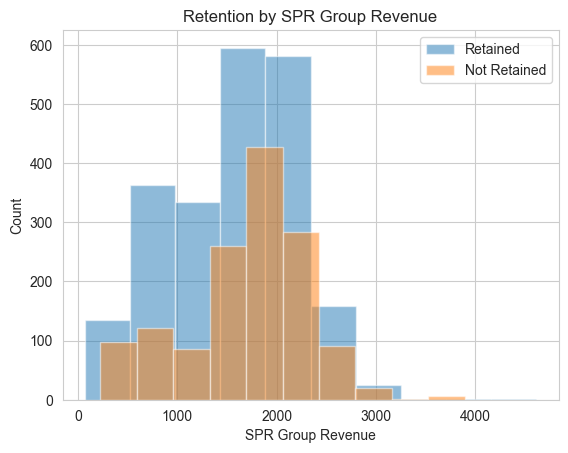

In [55]:
# Create the histogram
plt.hist(final_df[final_df['Retained']==1]['SPR_Group_Revenue'], bins=10, alpha=0.5, label='Retained')
plt.hist(final_df[final_df['Retained']==0]['SPR_Group_Revenue'], bins=10, alpha=0.5, label='Not Retained')
plt.title('Retention by SPR Group Revenue')
plt.xlabel('SPR Group Revenue')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

Histogram: Retention by Number of FPPs that bought trip cancellation insurance

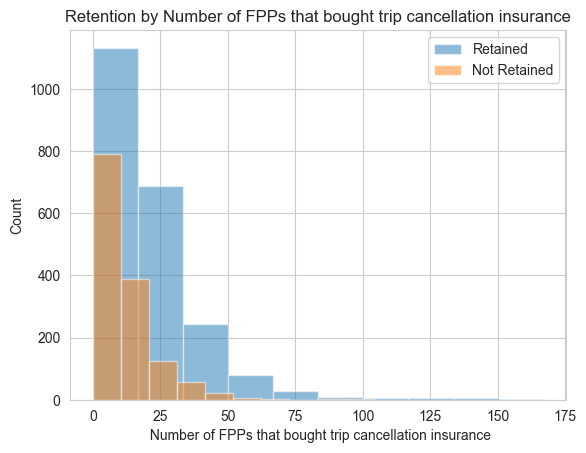

In [56]:
# Create the histogram
plt.hist(final_df[final_df['Retained']==1]['FRP_Active'], bins=10, alpha=0.5, label='Retained')
plt.hist(final_df[final_df['Retained']==0]['FRP_Active'], bins=10, alpha=0.5, label='Not Retained')
plt.title('Retention by Number of FPPs that bought trip cancellation insurance')
plt.xlabel(' Number of FPPs that bought trip cancellation insurance')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

Histogram: Retention by number of extra passengers

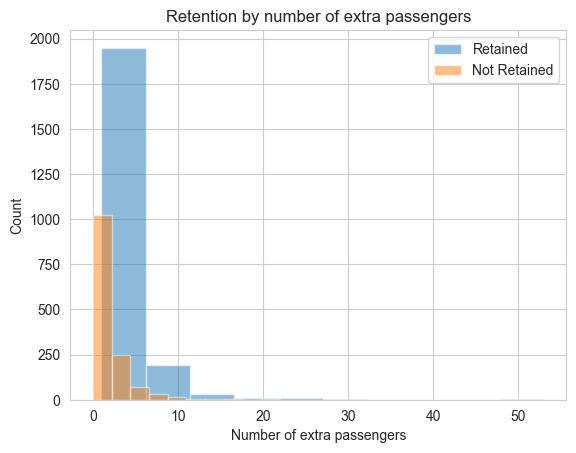

In [57]:
# Create the histogram
plt.hist(final_df[final_df['Retained']==1]['Total_Discount_Pax'], bins=10, alpha=0.5, label='Retained')
plt.hist(final_df[final_df['Retained']==0]['Total_Discount_Pax'], bins=10, alpha=0.5, label='Not Retained')
plt.title('Retention by number of extra passengers')
plt.xlabel('Number of extra passengers')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

Bar Plot: Retention by Income Level

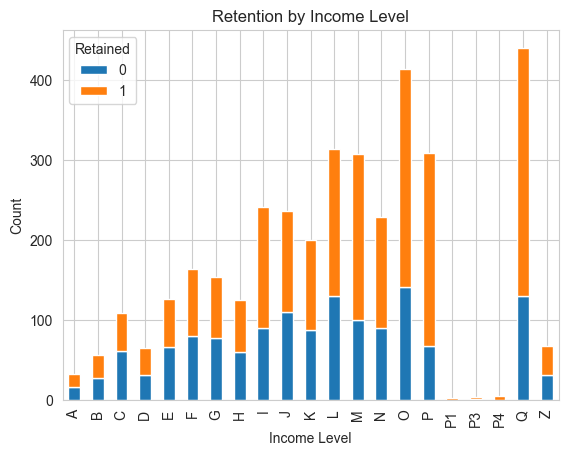

In [58]:
retained_by_income_level = final_df.groupby(['Income_Level', 'Retained'])['final_ID'].count().unstack()
retained_by_income_level.plot(kind='bar', stacked=True)
plt.title('Retention by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()

Bar Plot: Retention by Departure Month

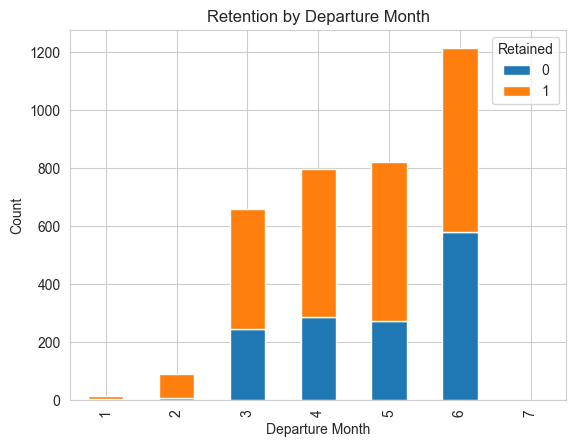

In [59]:
retained_by_departure_month = final_df.groupby(['Departure_Month', 'Retained'])['final_ID'].count().unstack()
retained_by_departure_month.plot(kind='bar', stacked=True)
plt.title('Retention by Departure Month')
plt.xlabel('Departure Month')
plt.ylabel('Count')
plt.show()

Scatterplot: Retention Rate by Days from Last Communication to Departure

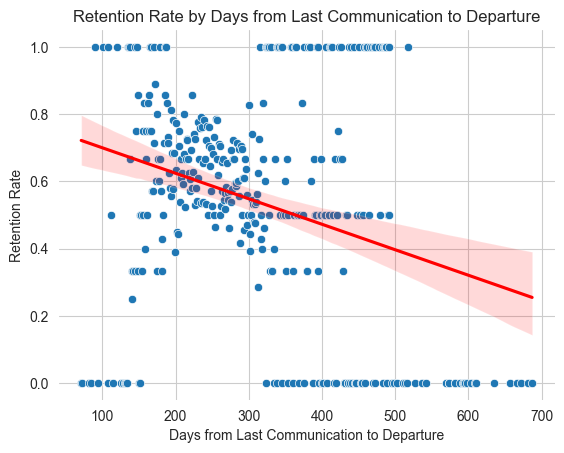

In [61]:
# Calculate the retention rate for each number of days from last communication to departure
grouped_df = final_df.groupby(['Days_LCtoDD'])['Retained'].mean().reset_index()

# Create a scatter plot using seaborn
ax = sns.scatterplot(data=grouped_df, x='Days_LCtoDD', y='Retained')

# Add a trend line
sns.regplot(data=grouped_df, x='Days_LCtoDD', y='Retained', scatter=False, color='red')

# Customize the chart
plt.title('Retention Rate by Days from Last Communication to Departure')
plt.xlabel('Days from Last Communication to Departure')
plt.ylabel('Retention Rate')

# Remove graph lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Show the chart
plt.show()

Bar Chart: Retention by School Size Indicator

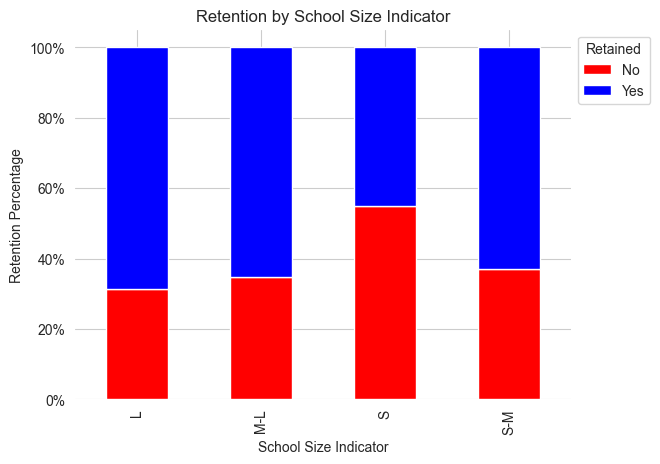

In [62]:
# Calculate the count of retained and not retained for each School Size Indicator
retained_by_school_size_indicator = final_df.groupby(['SchoolSizeIndicator', 'Retained'])['final_ID'].count().unstack()

# Calculate the retention percentage for each School Size Indicator
retained_percentages = retained_by_school_size_indicator.div(retained_by_school_size_indicator.sum(axis=1), axis=0)

# Create the stacked bar chart
ax = retained_percentages.plot(kind='bar', stacked=True, color=['red', 'blue'])

# Customize the chart
plt.title('Retention by School Size Indicator')
plt.xlabel('School Size Indicator')
plt.ylabel('Retention Percentage')

# Remove graph lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Format the y-axis as a percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

# Adjust the legend and change labels
ax.legend(['No', 'Yes'], title='Retained', loc='upper left', bbox_to_anchor=(1, 1))

# Show the chart
plt.show()

Scatter Plot: Retention by Days from First Parent Meeting to Travel Date

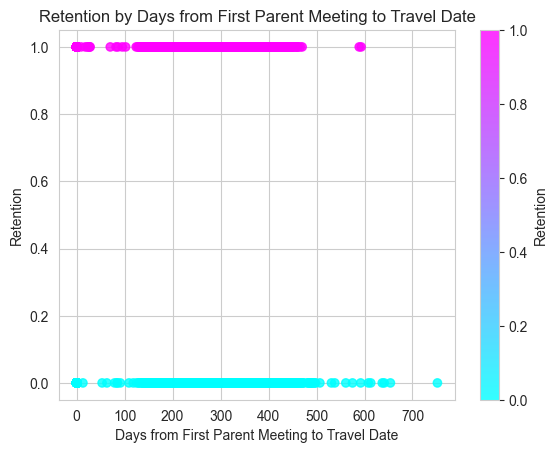

In [63]:
# Create a scatter plot with retention on the y-axis and days on the x-axis
plt.scatter(final_df['DifferenceTraveltoFirstMeeting'], final_df['Retained'], c=final_df['Retained'], cmap='cool', alpha=0.8)

# Add a colorbar to show the range of retention values
cbar = plt.colorbar()
cbar.set_label('Retention')

# Add labels and title
plt.xlabel('Days from First Parent Meeting to Travel Date')
plt.ylabel('Retention')
plt.title('Retention by Days from First Parent Meeting to Travel Date')

# Show the plot
plt.show()

Scatter Plot: Retention by Days from First Parent Meeting to Travel Date

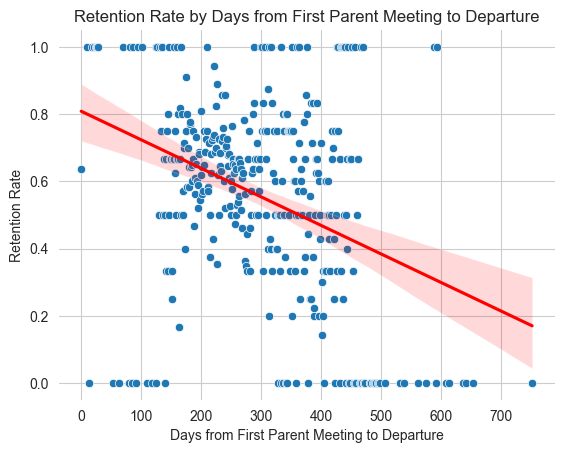

In [64]:
# Calculate the retention rate for each number of days from first parent meeting to departure
grouped_df = final_df.groupby(['DifferenceTraveltoFirstMeeting'])['Retained'].mean().reset_index()

# Create a scatter plot using seaborn
ax = sns.scatterplot(data=grouped_df, x='DifferenceTraveltoFirstMeeting', y='Retained')

# Add a trend line
sns.regplot(data=grouped_df, x='DifferenceTraveltoFirstMeeting', y='Retained', scatter=False, color='red')

# Customize the chart
plt.title('Retention Rate by Days from First Parent Meeting to Departure')
plt.xlabel('Days from First Parent Meeting to Departure')
plt.ylabel('Retention Rate')

# Remove graph lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Show the chart
plt.show()